In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import QuantileTransformer

from env import get_db_url
from wrangle import *

In [2]:
# Acquire Zillow Dataset
df = wrangle_zillow()

Reading CSV


/Users/dusts/codeup-data-science/regression-exercises/wrangle.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fips'] = df['fips'].apply(int)
/Users/dusts/codeup-data-science/regression-exercises/wrangle.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fips'] = df['fips'].apply(str)
/Users/dusts/codeup-data-science/regression-exercises/wrangle.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [3]:
# Split Data
zillow_train, zillow_val, zillow_test = split_data(df)

# Practice DataFrame

In [7]:
target_df = zillow_train[['calculatedfinishedsquarefeet']]

# Creating Scaler

In [13]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(target_df)

mm_df = scaler.transform(target_df)

# Inversed Method

In [22]:
mm_inversed = scaler.inverse_transform(mm_df)

In [23]:
mm_inversed[:5]

array([[2317.],
       [1100.],
       [3262.],
       [1920.],
       [ 992.]])

In [33]:
target_df.head().values

array([[2317.],
       [1100.],
       [3262.],
       [1920.],
       [ 992.]])

### QuantileTransformer

In [39]:
qt = QuantileTransformer(output_distribution='normal')
qt_df = qt.fit_transform(target_df)

In [43]:
qt_df = pd.DataFrame(qt_df)

### Visualizing Original vs QuantileTransformer

(-3.5, 3.5)

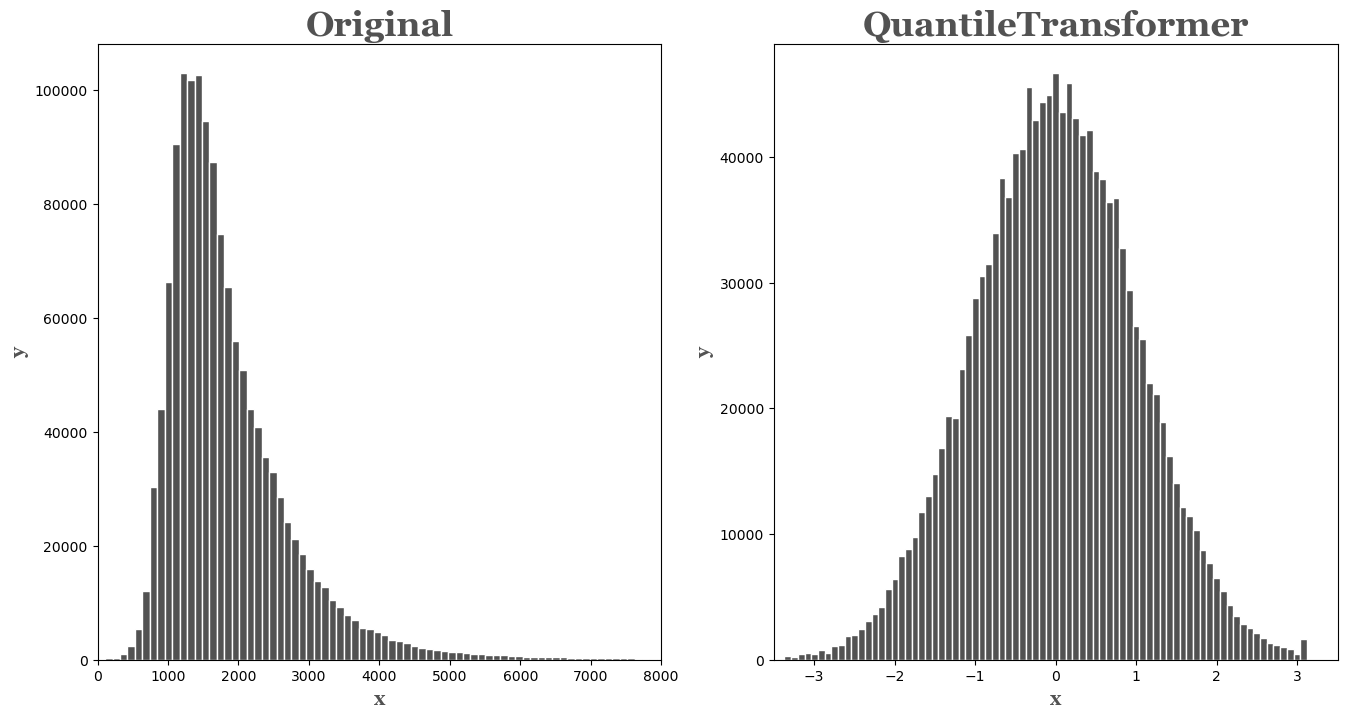

In [83]:
font = {'family': 'Georgia',
            'color':  '#525252',
            'weight': 'bold',
            'size': 25,
            }
fig, ax = plt.subplots(1, 2,figsize=(16,8))

# Original
ax[0].hist(target_df, color="#525252",ec='white',bins=9000)
ax[0].set_ylabel(r"y", fontsize=14, color="#525252", fontdict=font)
ax[0].set_xlabel(r"x", fontsize=14, color="#525252", fontdict=font)
ax[0].set_title("Original",color='#525252', fontdict=font)
ax[0].set_xlim([0, 8000])

# QuantileTransformer
ax[1].hist(qt_df, color="#525252",ec='white',bins=125)
ax[1].set_ylabel(r"y", fontsize=14, color="#525252", fontdict=font)
ax[1].set_xlabel(r"x", fontsize=14, color="#525252", fontdict=font)
ax[1].set_title("QuantileTransformer",color='#525252', fontdict=font)
ax[1].set_xlim([-3.5, 3.5])

# Function Plot All Scaled Data

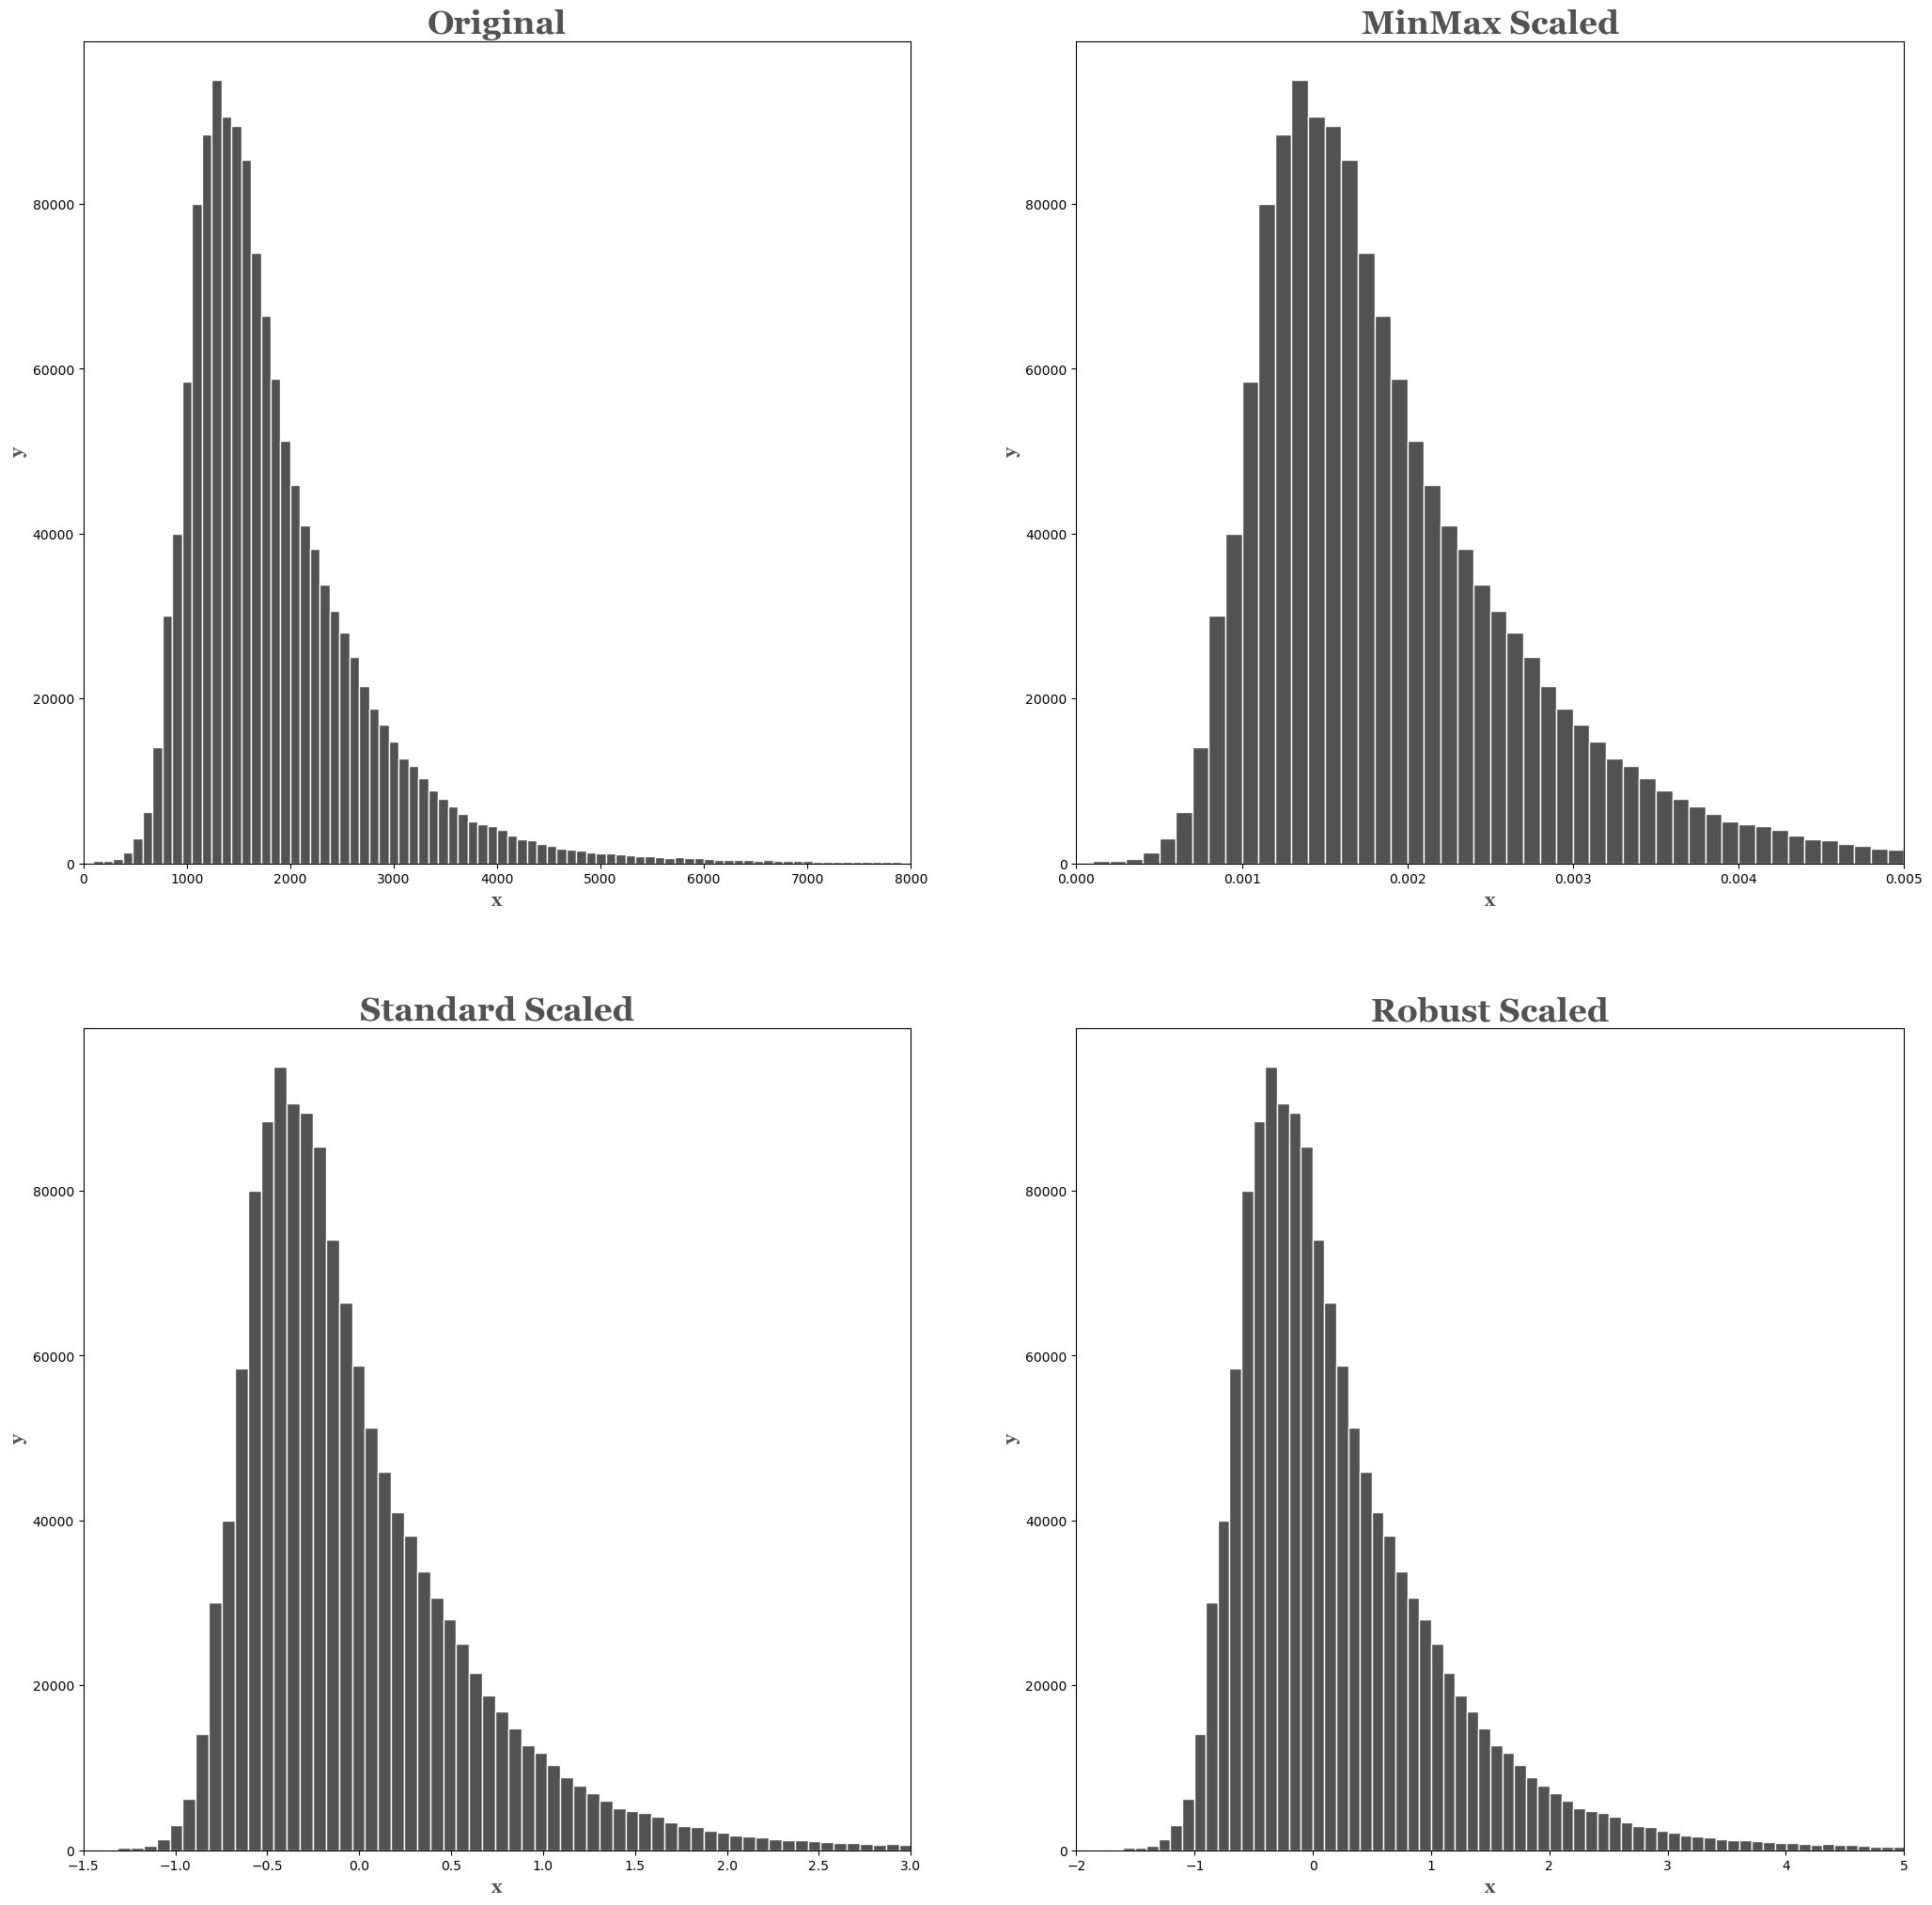

In [4]:
# Function To Visualize All Scaler Types
# and compare to original DataFrame
compare_scalers(zillow_train[['calculatedfinishedsquarefeet']])